## ИДЗ1

### Задание: 
Модель задана дифференциальным уравнением, которое имеет вид х'(t) = k(t)*f(t). Функция f известна, функцию k нужно найти. Предполагается, что k имеет вид k(t) = а*е^(b*t) или k(t) = a*b^t.

Функция f(t) имеет вид: f(t) = p * t^m + q * t^n + r, параметры для 30 вариантов приведены в документе EXCEL.

Кроме этого, известны значения x'(t), t = [0 : 0.1 : 1] – 30 строчек по 11 значений, для 30 вариантов.

Замечание. Для решения ДУ по методу Эйлера начальное значение х(0)=х0 определить самостоятельно.

In [1]:
# подключение библиотек
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
%matplotlib inline

In [6]:
# считывание данных
x_t = pd.read_csv('value1.csv', sep=';')
print("Значения x'(t) при соответствующих значениях t:\n", x_t)

param = pd.read_csv('value2.csv', sep=';', skiprows=0).values[0]
print("\n\nЗначения параметров для функции f(t):\n", param)

Значения x'(t) при соответствующих значениях t:
       t    x_pr(t)
0   0.0   2.731796
1   0.1   3.073904
2   0.2   3.363661
3   0.3   3.680299
4   0.4   4.230261
5   0.5   4.772622
6   0.6   5.586051
7   0.7   6.720271
8   0.8   8.066742
9   0.9   9.844773
10  1.0  12.263060


Значения параметров для функции f(t):
 [3 0 2 1 2]


In [7]:
# функция расчёта значений k(t)
def funcK(x_t, param):
    k = []
    for i in range(len(x_t.values[:])):
        k.append(float(x_t['x_pr(t)'][i] / 
            (param[2]* (x_t['x_pr(t)'][i])**param[0] + param[3]*(x_t['x_pr(t)'][i])**param[1] + param[4])))
    return(k)

In [8]:
# полученные значение k(t)
K = funcK(x_t, param)
K

[0.06240795666006228,
 0.050317689040645756,
 0.04251642472087989,
 0.03583670883516267,
 0.02739771995610202,
 0.021652320718597788,
 0.01588688725337531,
 0.011016794125073427,
 0.007661862861588909,
 0.005150820485551109,
 0.003322149835571193]

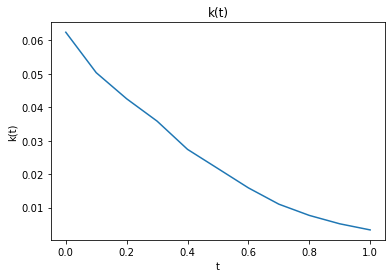

In [9]:
# график зависимости k от аргумента t
plt.plot(x_t['t'][:], K)
plt.title('k(t)')
plt.xlabel('t')
plt.ylabel('k(t)')
plt.show()

В результате, был получен график приближённый к прямой. Найдём коэффициенты a и b.

1) Коэффициенты для модели вида k(t) = a1*t + b1;

In [10]:
a1 = (np.mean(x_t['t'][:] * K) - np.mean(x_t['t'][:])*np.mean(K)) / (np.mean(x_t['t'][:]**2) - np.mean(x_t['t'][:])**2)
b1 = np.mean(K) - a1*np.mean(x_t['t'][:])
print("a1 = %.5f" % a1)
print("b1 = %.5f" % b1)

a1 = -0.05835
b1 = 0.05492


In [11]:
# предсказанные первой моделью значения
y_1 = a1*x_t['t'][:] + b1
y_1

0     0.054916
1     0.049081
2     0.043246
3     0.037412
4     0.031577
5     0.025742
6     0.019908
7     0.014073
8     0.008239
9     0.002404
10   -0.003431
Name: t, dtype: float64

In [27]:
# Рассчёт коэффиента детерминации для первой модели
R2_1 = r2_score(K, y_1)
print("R2 = %.5f" % R2_1) 

R2 = 0.95563


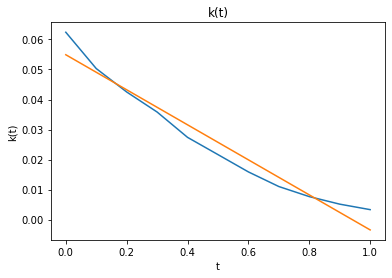

In [28]:
# сравнение теоретической и эмпирической функций первой модели
plt.plot(x_t['t'][:], K)
plt.plot(x_t['t'][:], y_1)
plt.title('k(t)')
plt.xlabel('t')
plt.ylabel('k(t)')
plt.show()

2) Коэффициенты для модели вида k(t) = b2* e^(a2* t);

In [29]:
a2 = (np.mean(x_t['t'][:] * list(map(math.log, K))) - np.mean(x_t['t'][:])*np.mean(list(map(math.log, K)))) \
        / (np.mean(x_t['t'][:]**2) - np.mean(x_t['t'][:])**2)
b2 = math.exp(np.mean(list(map(math.log, K))) - a2*np.mean(x_t['t'][:]))
print("a2 = %.5f" % a2)
print("b2 = %.5f" % b2)

a2 = -2.89338
b2 = 0.07658


In [30]:
# предсказанные второй моделью значения
y_2 = b2*np.exp(a2*x_t['t'][:])
y_2

0     0.076575
1     0.057336
2     0.042931
3     0.032145
4     0.024069
5     0.018022
6     0.013494
7     0.010104
8     0.007565
9     0.005665
10    0.004241
Name: t, dtype: float64

In [25]:
# Рассчёт коэффиента детерминации для второй модели

R2_2 = r2_score(K, y_2)
print("R2 = %.5f" % R2_2)

R2 = 0.92454


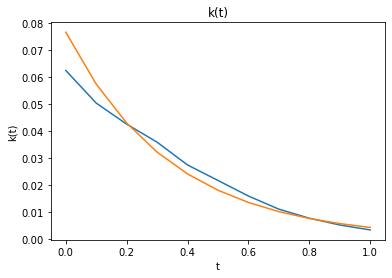

In [31]:
# сравнение теоретической и эмпирической функции второй модели
plt.plot(x_t['t'][:], K)
plt.plot(x_t['t'][:], y_2)
plt.title('k(t)')
plt.xlabel('t')
plt.ylabel('k(t)')
plt.show()

В результате, более точной является линейная модель k(t) = a1*t + b1 с R2 = 0.95563.